# 1 Problem Statement

# 2 Getting Started - Loading Libraries and Datasets

## 2.1 Load Libraries

In [9]:
# import libraries
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import ast # convert dictionary-look list into dictionary
import re # extract the hashtags
from collections import Counter # count the number of hashtags showing as lists in a column
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob # TextBlob - for sentiment analysis
import concurrent.futures # use in sentiment analysis - for efficient analysis
import nltk # for sentiment analysis 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # sentiment analysis, working together with nltk
from nltk.tokenize import word_tokenize # when looking for common words used in the 'negative' comments
from nltk.corpus import stopwords # remove stop words
import string # use when removing punctuations

## 2.2 Load TikTok Datasets

### 2.2.1 Load the 'Url' Dataset

In [10]:
# read in the 'url' text file
with open('Urls_Scrape2 (1).txt') as f:
    url = f.read()

# transform the text format to JSON format
url =  json.loads(url)

In [11]:
# verify the readness
for i in url['https://www.tiktok.com/@quefourfour/video/7071999725515427114']:
    print(i)

users
text
music
video
stats


### 2.2.2 Load the 'Comment' Dataset

In [12]:
# read in the 'comments' data from a JSON file
with open('comments.json') as f:
    comment = json.load(f)

In [13]:
# iterate through the file, print some parts to verify the readness of the dataset
for i in comment['https://www.tiktok.com/@kimisshe/video/7208767339234364714']:
    print(i)

{'user_id': 'drewpilot001', 'text': 'yummy 😁', 'like_count': '0', 'user_name': 'Adrewthepilot'}
{'user_id': 'kimisshe', 'text': "Community discussion....what's your healthy snack idea? Butternut squash is my latest veggie addition.", 'like_count': '0', 'user_name': 'KimIsShe'}


In [14]:
# check the data type of 'comments'
type(comment)

dict

# 3 EDA on 'Url' and 'Comment' Datasets

## 3.1 EDA on the 'Url' Dataset

### 3.1.1 Prepare the 'Url' Dataset

In [15]:
# convert the dictonary-formatted 'url' data into the data frame format
url = pd.DataFrame.from_dict(url, orient = 'columns').T
url.head()

,users,text,music,video,stats
https://www.tiktok.com/@quefourfour/video/7071999725515427114,"[{'user_id': 'quefourfour', 'user_name': 'quef...",{'desc': 'Beef brisket #manshallnotlivebybread...,"{'title': 'original sound', 'author_name': 'qu...","{'id': '7071999725515427114', 'ratio': '720p',...","{'diggCount': 124100, 'shareCount': 2328, 'com..."
https://www.tiktok.com/@christinephilippa/video/7127245635572583681,"[{'user_id': 'christinephilippa', 'user_name':...",{'desc': 'Replying to @ellen_sarah1 inside wi...,"{'title': 'original sound', 'author_name': 'li...","{'id': '7127245635572583681', 'ratio': '720p',...","{'diggCount': 6650, 'shareCount': 4, 'commentC..."
https://www.tiktok.com/@missdeedang/video/6890445281410731265,"[{'user_id': 'missdeedang', 'user_name': 'Dee ...",{'desc': 'Pwede ba ang Saging sa Keto-Low Carb...,"{'title': 'original sound - Dee ♥️', 'author_n...","{'id': '6890445281410731265', 'ratio': '720p',...","{'diggCount': 23600, 'shareCount': 21, 'commen..."
https://www.tiktok.com/@tinydancingsocialworker/video/6903730689737362693,"[{'user_id': 'tinydancingsocialworker', 'user_...",{'desc': '#stitch with @livs_journey7 #greensc...,"{'title': 'original sound', 'author_name': 'Em...","{'id': '6903730689737362693', 'ratio': '720p',...","{'diggCount': 11, 'shareCount': 0, 'commentCou..."
https://www.tiktok.com/@howwelife247/video/6845669009946348805,"[{'user_id': 'howwelife247', 'user_name': 'How...",{'desc': '#protein #momsoftiktok #dadsoftiktok...,"{'title': 'original sound', 'author_name': 'Ho...","{'id': '6845669009946348805', 'ratio': '720p',...","{'diggCount': 16800, 'shareCount': 1538, 'comm..."


In [16]:
# convert the 'users' column from dictionary-formatted list into list
def lst_to_dict(lst):
    return lst[0]

url['users'] = url['users'].apply(lambda lst: lst_to_dict (lst))

In [17]:
# extract keys from the dictionaries to new columns
url['user_id'] = url['users'].apply(lambda x: x['user_id'])
url['user_name'] = url['users'].apply(lambda x: x['user_name'])
url['is_verified'] = url['users'].apply(lambda x: x['is_verifed'])

url['desc'] = url['text'].apply(lambda x: x['desc'])
url['challenges'] = url['text'].apply(lambda x: x['challenges'])
url['tagged'] = url['text'].apply(lambda x: x['tagged'])

url['m_title'] = url['music'].apply(lambda x: x['title'])
url['m_author'] = url['music'].apply(lambda x: x['author_name'])

url['video_id'] = url['video'].apply(lambda x: x['id'])
url['video_ratio'] = url['video'].apply(lambda x: x['ratio'])
url['video_height'] = url['video'].apply(lambda x: x['height'])
url['video_width'] = url['video'].apply(lambda x: x['width'])
url['video_create_time'] = url['video'].apply(lambda x: x['createTime'])
url['video_duration'] = url['video'].apply(lambda x: x['duration'])
url['video_bitrate'] = url['video'].apply(lambda x: x['bitrate'])
url['video_encodedtype'] = url['video'].apply(lambda x: x['encodedType'])
url['video_format'] = url['video'].apply(lambda x: x['format'])
url['video_quality'] = url['video'].apply(lambda x: x['videoQuality'])
url['video_codectype'] = url['video'].apply(lambda x: x['codecType'])
url['video_definition'] = url['video'].apply(lambda x: x['definition'])

url['diggcount'] = url['stats'].apply(lambda x: x['diggCount'])
url['sharecount'] = url['stats'].apply(lambda x: x['shareCount'])
url['commentcount'] = url['stats'].apply(lambda x: x['commentCount'])
url['playcount'] = url['stats'].apply(lambda x: x['playCount'])

In [18]:
# drop old columns which are not needed anymore
url.drop(columns=['users','text','music','video','stats'], inplace = True)

In [19]:
# check the head of the 'url' data frame
url.head()

,user_id,user_name,is_verified,desc,challenges,tagged,m_title,m_author,video_id,video_ratio,...,video_bitrate,video_encodedtype,video_format,video_quality,video_codectype,video_definition,diggcount,sharecount,commentcount,playcount
https://www.tiktok.com/@quefourfour/video/7071999725515427114,quefourfour,quefourfour,False,Beef brisket #manshallnotlivebybreadalone #que...,"[manshallnotlivebybreadalone, quefourfour, sim...",[],original sound,quefourfour,7071999725515427114,720p,...,1696223.0,normal,mp4,normal,h264,720p,124100,2328,1461,3200000
https://www.tiktok.com/@christinephilippa/video/7127245635572583681,christinephilippa,Christine | Mother + Self Love,False,Replying to @ellen_sarah1 inside with my kidd...,"[bodygoals, postpartum, momlife, heslthjourney...",[ellen_sarah1],original sound,lillie™,7127245635572583681,720p,...,1108580.0,normal,mp4,normal,h264,720p,6650,4,19,96600
https://www.tiktok.com/@missdeedang/video/6890445281410731265,missdeedang,Dee ♥️,False,Pwede ba ang Saging sa Keto-Low Carb Diet? #ke...,"[keto, lowcarb, LearnOnTikTok, diet, saging, i...",[],original sound - Dee ♥️,Dee ♥️,6890445281410731265,720p,...,1394839.0,normal,mp4,normal,h264,720p,23600,21,19,208700
https://www.tiktok.com/@tinydancingsocialworker/video/6903730689737362693,tinydancingsocialworker,"Emily Marie, MSW",False,#stitch with @livs_journey7 #greenscreen #edve...,"[fearfoodchallenge, edvent, greenscreen, edven...",[livs_journey7],original sound,"Emily Marie, MSW",6903730689737362693,720p,...,387700.0,normal,mp4,normal,h264,720p,11,0,3,286
https://www.tiktok.com/@howwelife247/video/6845669009946348805,howwelife247,Howwelife247,False,#protein #momsoftiktok #dadsoftiktok #easyreci...,"[carbsdontmakeyoufat, protein, MomsofTikTok, d...",[],original sound,Howwelife247,6845669009946348805,720p,...,1192432.0,normal,mp4,normal,h264,720p,16800,1538,136,238400


In [20]:
url.shape

(14816, 24)

In [21]:
url.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14816 entries, https://www.tiktok.com/@quefourfour/video/7071999725515427114 to https://www.tiktok.com/@tiffsrec/video/6865030912879414533
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            14816 non-null  object 
 1   user_name          14816 non-null  object 
 2   is_verified        14816 non-null  bool   
 3   desc               14816 non-null  object 
 4   challenges         14816 non-null  object 
 5   tagged             14816 non-null  object 
 6   m_title            14816 non-null  object 
 7   m_author           14673 non-null  object 
 8   video_id           14816 non-null  object 
 9   video_ratio        14816 non-null  object 
 10  video_height       14816 non-null  int64  
 11  video_width        14816 non-null  int64  
 12  video_create_time  14816 non-null  object 
 13  video_duration     14816 non-null  int64  
 14  video_bitr

In [22]:
# get the statistical stats of the 'url' dataframe
url_descirbe = url.describe()
url_descirbe

,video_height,video_width,video_duration,video_bitrate,diggcount,sharecount,commentcount,playcount
count,14816.000000,14816.000000,14816.000000,1.459400e+04,1.481600e+04,14816.000000,14816.000000,1.481600e+04
mean,995.972327,572.090983,33.933855,1.287822e+06,2.332820e+05,4422.450459,1847.962878,1.896931e+06
std,149.381707,90.963982,36.582280,5.766849e+05,5.416404e+05,19603.198397,6295.813895,4.513924e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1024.000000,576.000000,11.000000,9.222692e+05,5.098000e+03,22.000000,41.000000,5.165000e+04
50%,1024.000000,576.000000,21.000000,1.233897e+06,3.010000e+04,232.000000,247.000000,3.583500e+05
75%,1024.000000,576.000000,48.000000,1.583703e+06,2.057000e+05,1751.500000,1095.000000,1.800000e+06
max,1920.000000,1280.000000,489.000000,6.136039e+06,9.400000e+06,877800.000000,194300.000000,1.088000e+08


In [23]:
url.columns

Index(['user_id', 'user_name', 'is_verified', 'desc', 'challenges', 'tagged',
       'm_title', 'm_author', 'video_id', 'video_ratio', 'video_height',
       'video_width', 'video_create_time', 'video_duration', 'video_bitrate',
       'video_encodedtype', 'video_format', 'video_quality', 'video_codectype',
       'video_definition', 'diggcount', 'sharecount', 'commentcount',
       'playcount'],
      dtype='object')

### 3.1.2 Visualization on the 'Url' Dataset

#### check the missing data of 'Url'

<Axes: >

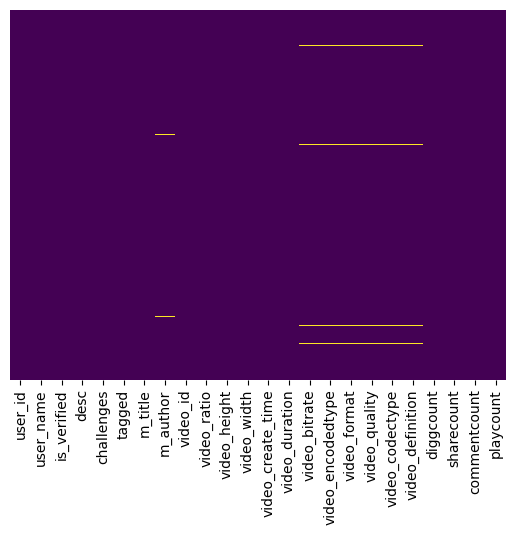

In [24]:
sns.heatmap(url.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### how many users are verified?

<Axes: xlabel='is_verified', ylabel='count'>

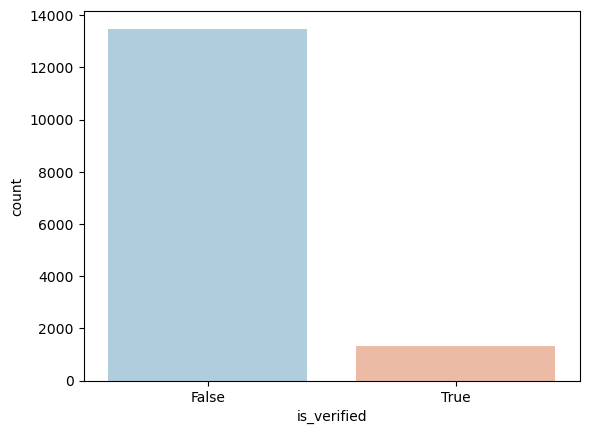

In [25]:
sns.countplot(x='is_verified',data=url,palette='RdBu_r')
# most of the video posters are unverified

#### find out top used hashtags among all videos in the sample

In [26]:
# extract (hashtags) keywords from 'desc' column
url['hashtag'] = url['desc'].apply(lambda x: re.findall(r'#(\w+)',x))

# flatten the lists of hashtags into a single list
all_hashtags = [tag for tags in url['hashtag'] for tag in tags]

# count the occurrences of each hashtag
hashtag_counts = Counter(all_hashtags)

# Convert the Counter object to a DataFrame for better presentation
df_hashtag_counts = pd.DataFrame(list(hashtag_counts.items()), columns=['hashtag', 'count'])

# Sort the DataFrame by Count in descending order
df_hashtag_counts = df_hashtag_counts.sort_values(by='count', ascending=False)

# show the most frequent ones
df_hashtag_counts.head()

,hashtag,count
33,fyp,4645
91,foryou,2045
49,weightloss,1952
44,bodypositivity,1868
3,keto,1479


In [27]:
# frame the most used 20 hashtags
frequent_hashtag = df_hashtag_counts.head(20)
frequent_hashtag

,hashtag,count
33,fyp,4645
91,foryou,2045
49,weightloss,1952
44,bodypositivity,1868
3,keto,1479
34,whatieatinaday,1395
21,edrecovery,1221
95,foryoupage,1118
81,fypシ,996
247,juicecleanse,975


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'fyp'),
  Text(1, 0, 'foryou'),
  Text(2, 0, 'weightloss'),
  Text(3, 0, 'bodypositivity'),
  Text(4, 0, 'keto'),
  Text(5, 0, 'whatieatinaday'),
  Text(6, 0, 'edrecovery'),
  Text(7, 0, 'foryoupage'),
  Text(8, 0, 'fypシ'),
  Text(9, 0, 'juicecleanse'),
  Text(10, 0, 'bodyimage'),
  Text(11, 0, 'intermittentfasting'),
  Text(12, 0, 'dietculture'),
  Text(13, 0, 'fearfood'),
  Text(14, 0, 'fatacceptance'),
  Text(15, 0, 'cleaneating'),
  Text(16, 0, 'bodygoals'),
  Text(17, 0, 'food'),
  Text(18, 0, 'fitness'),
  Text(19, 0, 'recovery')])

/Users/sunweilu/anaconda3/envs/ds/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/Users/sunweilu/anaconda3/envs/ds/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


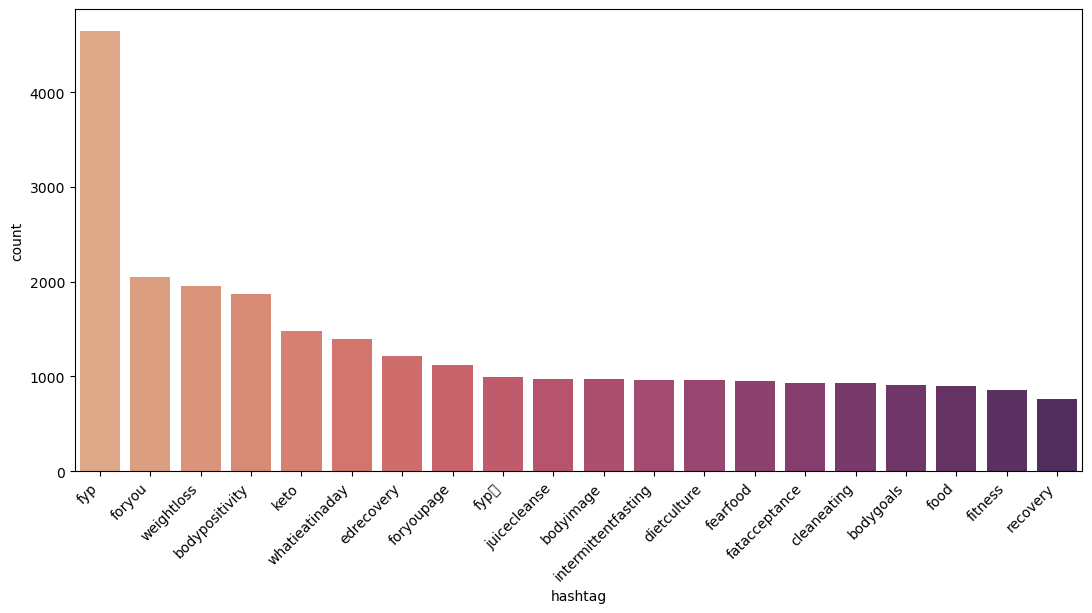

In [28]:
# visualize the most used 20 hashtags (in all videos)
plt.figure(figsize=(13, 6))
sns.barplot(data=frequent_hashtag, x='hashtag',y='count',palette='flare')
plt.xticks(rotation=45, ha='right')

#### the distribution of all hashtags appearing in the dataset

/var/folders/rp/81kw9f457w1chzvpxczhd9jh0000gn/T/ipykernel_31945/217634271.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hashtag_counts['count'],color='skyblue')


<Axes: xlabel='count', ylabel='Density'>

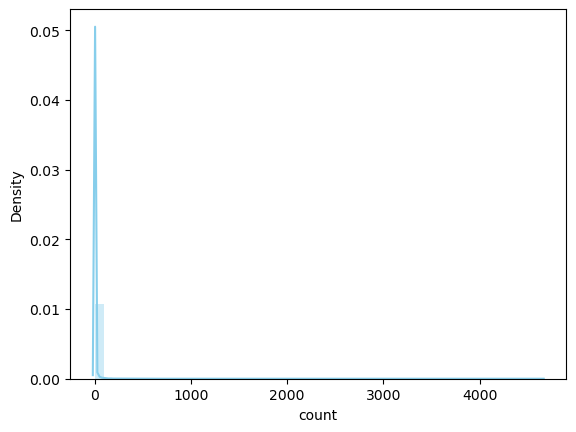

In [29]:
sns.distplot(df_hashtag_counts['count'],color='skyblue')

#### top used challenges among all videos in the sample

<Axes: xlabel='challenge', ylabel='count'>

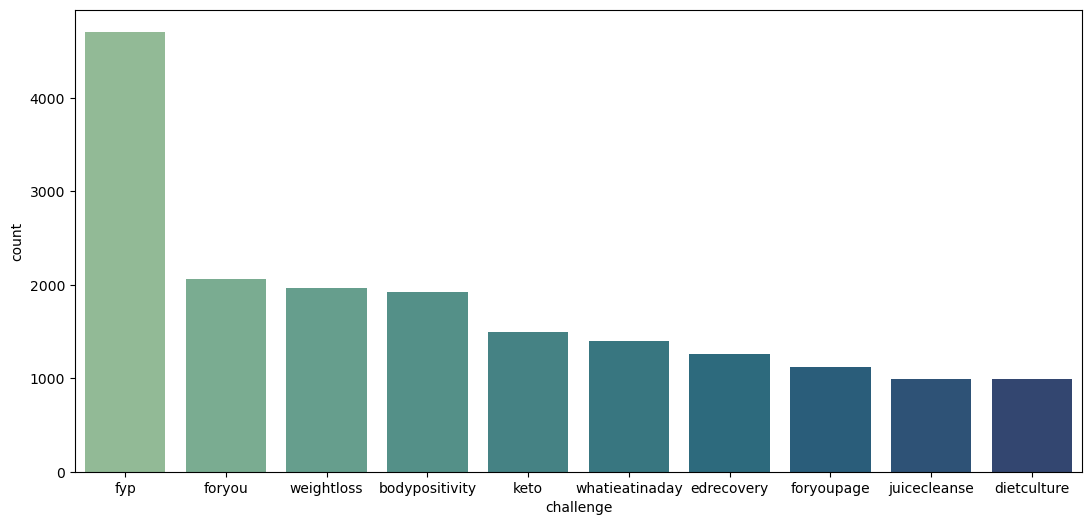

In [30]:
# extract the 'challenge' keywords from lists in the column
# flatten the lists of challenges into a single list
all_challenges = [chall for challs in url['challenges'] for chall in challs]

# count the occurrences of each challenge
chall_counts = Counter(all_challenges)

# Convert the Counter object to a DataFrame for better presentation
df_chall_counts = pd.DataFrame(list(chall_counts.items()), columns=['challenge', 'count'])

# Sort the DataFrame by Count in descending order
df_chall_counts = df_chall_counts.sort_values(by='count', ascending=False)

# show the most frequent ones
df_chall_counts

# most hot 10 challenges
df_chall_counts_fre = df_chall_counts.head(10)
plt.figure(figsize=(13, 6))
sns.barplot(data=df_chall_counts_fre, x='challenge',y='count',palette='crest')

#### volumns of videos over time

In [31]:
# check the type of the "video_create_time" data
type(url['video_create_time'][0])

str

In [32]:
# convert the 'video_create_time' column from string to 'date' type
def convert_time(timestamp_str):
    return datetime.utcfromtimestamp(int(timestamp_str))

url['video_create_time'] = url['video_create_time'].apply(lambda x: convert_time(x))

In [33]:
url.loc[(url['video_create_time'] > '2022') & (url['video_create_time'] < '2023')].shape

(5857, 25)

In [34]:
url.loc[(url['video_create_time'] > '2021') & (url['video_create_time'] < '2022')].shape

(4363, 25)

In [35]:
url.loc[(url['video_create_time'] > '2020') & (url['video_create_time'] < '2021')].shape

(2332, 25)

In [36]:
url.loc[(url['video_create_time'] > '2019') & (url['video_create_time'] < '2020')].shape

(104, 25)

In [37]:
url.loc[(url['video_create_time'] < '2019')].shape

(8, 25)

In [38]:
url['video_create_time'].min()

Timestamp('2016-12-30 03:30:10')

In [39]:
url['video_create_time'].max()

Timestamp('2023-04-20 03:57:06')

##### Conclusions of volumns of videos over time: As shown above, there are 5857 videos created in 2022, 4363 videos created in 2021, 2332 videos created in 2020, 104 video created in 2019, and 8 videos created before 2019 in the sample. The earliest video in this sample was created on December 30, 2016, while the latest video was created on April 20, 2023. Considering that TikTok was founded in 2016 and became popular in around 2020 and 2021, it matched the increase in the number of videos in this sample. 

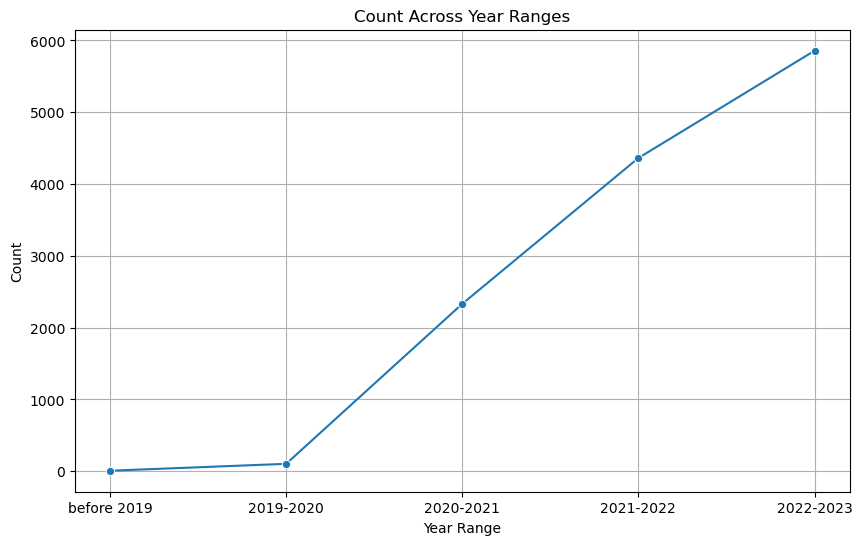

In [40]:
# line plot showing the number of videos created over time
count_time = pd.DataFrame({'before 2019': [8], '2019-2020': [104], '2020-2021': [2332], '2021-2022': [4363], '2022-2023': [5857]})
count_time_melted = count_time.melt(var_name='Year Range', value_name='Count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year Range', y='Count', data=count_time_melted, marker='o')
plt.title('Count Across Year Ranges')
plt.xlabel('Year Range')
plt.ylabel('Count')
plt.grid(True)
plt.show()

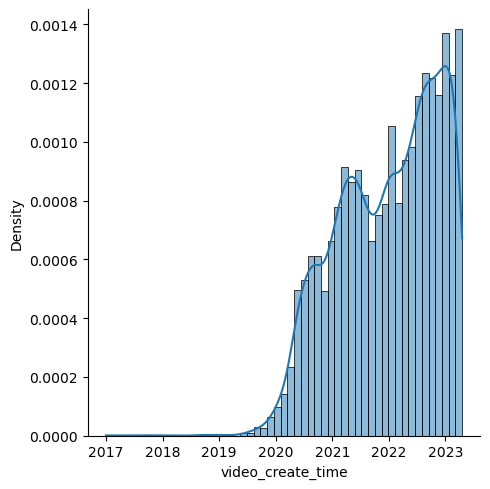

In [41]:
# the distribution of video_create_time
sns.displot(url['video_create_time'], kde=True, stat='density')

#### distribution of video duration

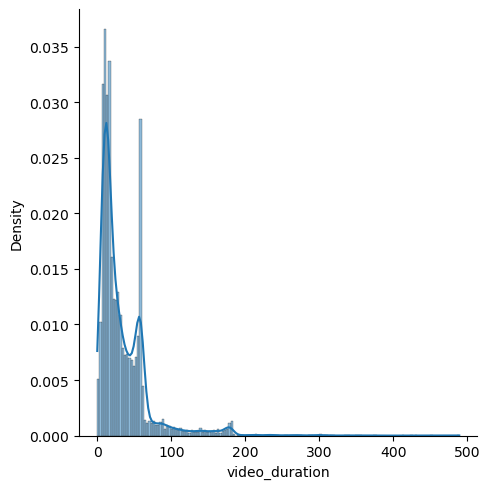

In [42]:
sns.displot(url['video_duration'], kde=True, stat='density')

#### find out the most used hashtags in 'high-quality' videos, which are defined by number of comments they got, the number of likes they got, and the number of shares they got

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'weightloss'),
  Text(1, 0, 'fyp'),
  Text(2, 0, 'bodypositivity'),
  Text(3, 0, 'foryou'),
  Text(4, 0, 'foryoupage'),
  Text(5, 0, 'whatieatinaday'),
  Text(6, 0, 'fitness'),
  Text(7, 0, 'transformation'),
  Text(8, 0, 'viral'),
  Text(9, 0, 'bodyimage'),
  Text(10, 0, 'fypシ'),
  Text(11, 0, 'motivation'),
  Text(12, 0, 'selflove'),
  Text(13, 0, 'weightlosstransformation'),
  Text(14, 0, 'weightlossjourney')])

/Users/sunweilu/anaconda3/envs/ds/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/Users/sunweilu/anaconda3/envs/ds/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


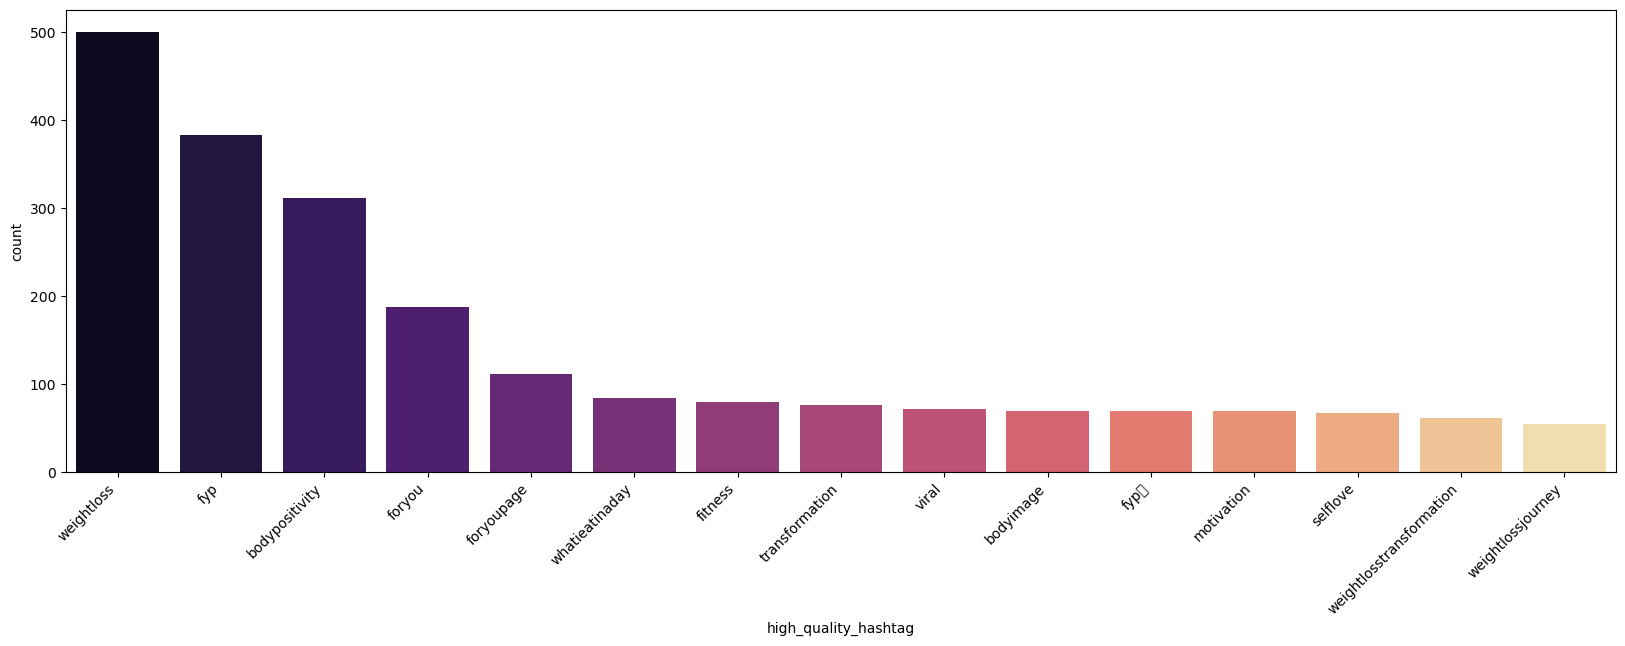

In [43]:
# top-quality videos based on 'commentcount', 'diggcount', and 'sharecount'
url['quality'] = url['diggcount'] * 1/3 + url['commentcount'] * 1/3 + url['sharecount'] * 1/3
url_high_quality = url.sort_values(by='quality', ascending=False).head(1000)
url_high_quality

# look for the common points in these 'high-quality' videos
# common hasgtags
url_high_quality['hashtag']

# flatten the lists of hashtags into a single list
quality_hashtags = [tag for tags in url_high_quality['hashtag'] for tag in tags]

# count the occurrences of each hashtag
quality_hashtag_counts = Counter(quality_hashtags)

# Convert the Counter object to a DataFrame for better presentation
df_quality_hashtag_counts = pd.DataFrame(list(quality_hashtag_counts.items()), columns=['high_quality_hashtag', 'count'])

# Sort the DataFrame by Count in descending order
df_quality_hashtag_counts = df_quality_hashtag_counts.sort_values(by='count', ascending=False).head(15)

# show the most frequent ones
df_quality_hashtag_counts

# plot the results
plt.figure(figsize=(20, 6))
sns.barplot(data=df_quality_hashtag_counts, x='high_quality_hashtag',y='count',palette='magma')
plt.xticks(rotation=45, ha='right')

#### find out the most used hashtags in 'wide-spread' videos, which are defined by number of plays they got

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'weightloss'),
  Text(1, 0, 'fyp'),
  Text(2, 0, 'bodypositivity'),
  Text(3, 0, 'foryou'),
  Text(4, 0, 'foryoupage'),
  Text(5, 0, 'whatieatinaday'),
  Text(6, 0, 'fitness'),
  Text(7, 0, 'viral'),
  Text(8, 0, 'keto'),
  Text(9, 0, 'transformation'),
  Text(10, 0, 'motivation'),
  Text(11, 0, 'fypシ'),
  Text(12, 0, 'weightlosstransformation'),
  Text(13, 0, 'selflove'),
  Text(14, 0, 'food')])

/Users/sunweilu/anaconda3/envs/ds/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/Users/sunweilu/anaconda3/envs/ds/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


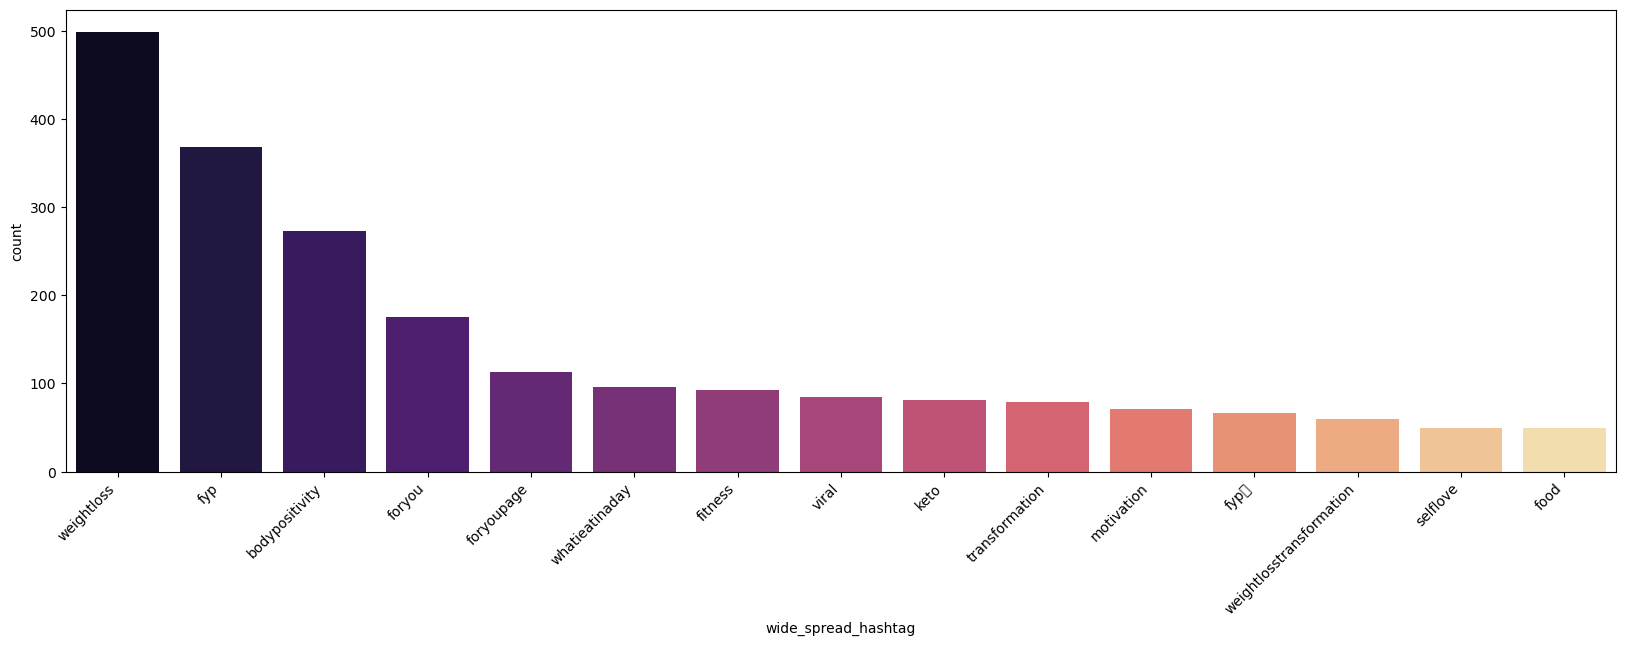

In [44]:
# most wide-spread videos based on 'playcount'
url_spread = url.sort_values(by='playcount', ascending=False).head(1000)
url_spread

# look for the common points in these 'wide-spread' videos
# common hasgtags
url_spread['hashtag']

# flatten the lists of hashtags into a single list
spread_hashtags = [tag for tags in url_spread['hashtag'] for tag in tags]

# count the occurrences of each hashtag
spread_hashtag_counts = Counter(spread_hashtags)

# Convert the Counter object to a DataFrame for better presentation
df_spread_hashtag_counts = pd.DataFrame(list(spread_hashtag_counts.items()), columns=['wide_spread_hashtag', 'count'])

# Sort the DataFrame by Count in descending order
df_spread_hashtag_counts = df_spread_hashtag_counts.sort_values(by='count', ascending=False).head(15)

# show the most frequent ones
df_spread_hashtag_counts

# plot the results
plt.figure(figsize=(20, 6))
sns.barplot(data=df_spread_hashtag_counts, x='wide_spread_hashtag',y='count',palette='magma')
plt.xticks(rotation=45, ha='right')

#### find out the most used hashtags in 'popular' videos, which are defined by a blend of 'high-quality' and 'wide-spread'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'weightloss'),
  Text(1, 0, 'fyp'),
  Text(2, 0, 'bodypositivity'),
  Text(3, 0, 'foryou'),
  Text(4, 0, 'foryoupage'),
  Text(5, 0, 'whatieatinaday'),
  Text(6, 0, 'fitness'),
  Text(7, 0, 'viral'),
  Text(8, 0, 'transformation'),
  Text(9, 0, 'keto'),
  Text(10, 0, 'motivation'),
  Text(11, 0, 'fypシ'),
  Text(12, 0, 'weightlosstransformation'),
  Text(13, 0, 'gym'),
  Text(14, 0, 'weightlosscheck')])

/Users/sunweilu/anaconda3/envs/ds/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/Users/sunweilu/anaconda3/envs/ds/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


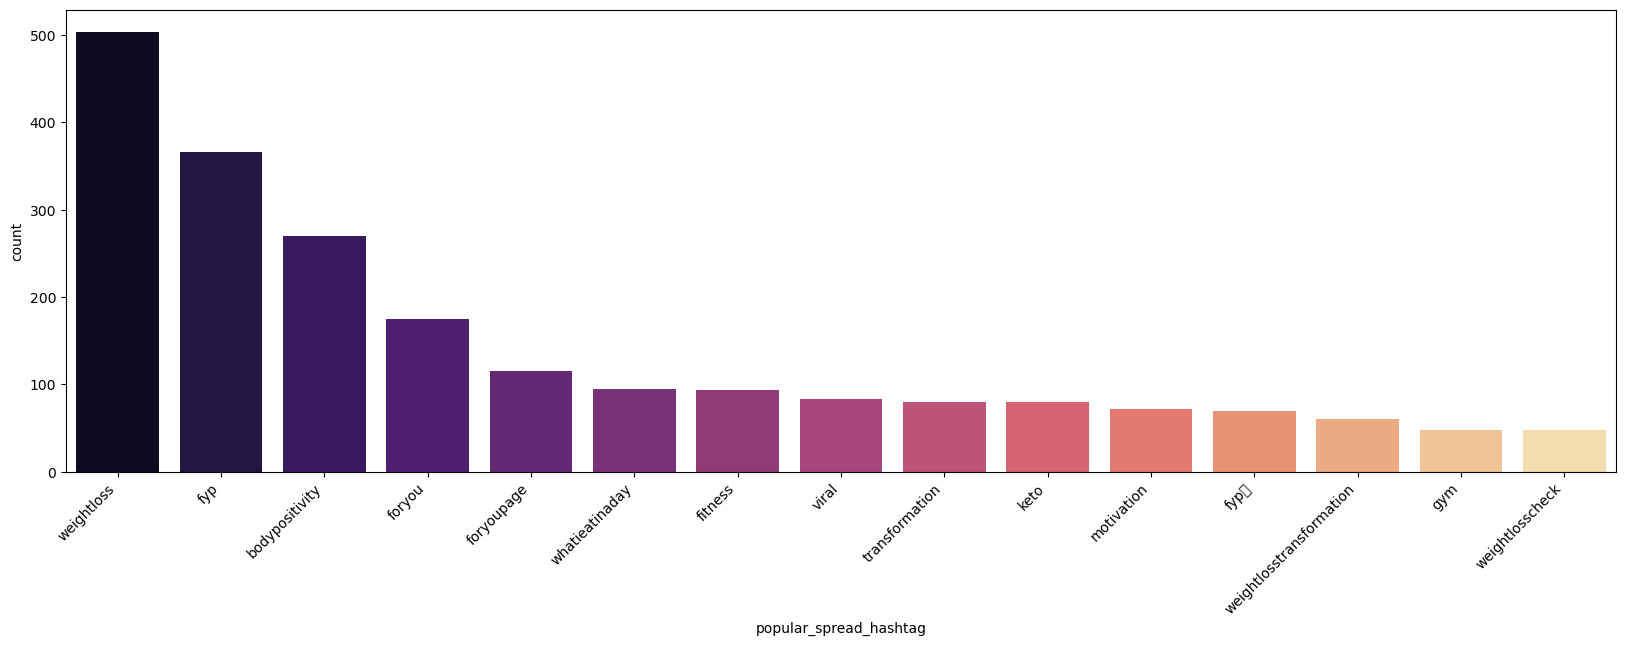

In [45]:
# combine the 'quality' and 'wide-spread' to see those 'popular' videos' commons

url['popularity'] = 1/2 * url['playcount'] + 1/2 * url['quality']

# most wide-spread videos based on 'playcount'
url_popular = url.sort_values(by='popularity', ascending=False).head(1000)
url_popular

# look for the common points in these 'popular' videos
# common hasgtags
url_popular['hashtag']

# flatten the lists of hashtags into a single list
popular_hashtags = [tag for tags in url_popular['hashtag'] for tag in tags]

# count the occurrences of each hashtag
popular_hashtag_counts = Counter(popular_hashtags)

# Convert the Counter object to a DataFrame for better presentation
df_popular_hashtag_counts = pd.DataFrame(list(popular_hashtag_counts.items()), columns=['popular_spread_hashtag', 'count'])

# Sort the DataFrame by Count in descending order
df_popular_hashtag_counts = df_popular_hashtag_counts.sort_values(by='count', ascending=False).head(15)

# show the most frequent ones
df_popular_hashtag_counts

# plot the results
plt.figure(figsize=(20, 6))
sns.barplot(data=df_popular_hashtag_counts, x='popular_spread_hashtag',y='count',palette='magma')
plt.xticks(rotation=45, ha='right')

#### find out the most commonly used words in the description of these most popular videos with the remove of stop words

In [46]:
# Extracting text from the 'desc' column
all_text = ' '.join(url_popular['desc'])

# Use NLTK's stop words
stop_words = set(stopwords.words('english'))

# Convert the set of stop words to a list
stop_words_list = list(stop_words)

# Use CountVectorizer with stop words removal
vectorizer = CountVectorizer(stop_words=stop_words_list)
word_counts = vectorizer.fit_transform([all_text])

# Create a DataFrame with the word counts
word_counts_df = pd.DataFrame(
    data=word_counts.toarray()[0],
    index=vectorizer.get_feature_names_out(),
    columns=['count']
)

# Sort the DataFrame by count in descending order to get the most common words
most_common_words = word_counts_df.sort_values(by='count', ascending=False)

# Display the top N most common words (adjust N as needed)
top_n = 20
print(most_common_words.head(top_n))

                          count
weightloss                  514
fyp                         368
bodypositivity              271
foryou                      175
foryoupage                  115
fitness                     103
keto                         97
viral                        96
whatieatinaday               94
transformation               87
motivation                   78
fypシ                         69
food                         65
weightlosstransformation     60
workout                      54
weight                       51
gym                          50
weightlosscheck              49
selflove                     48
weightlossjourney            47


#### find out the most common video_duration of popular videos filtered above

In [47]:
url_popular['video_duration'].value_counts().head(10)

15    96
9     51
10    50
11    45
12    44
14    42
7     42
59    35
13    32
8     31
Name: video_duration, dtype: int64

#### find out the most common 'create_time' of those popular videos

In [48]:
url_popular.loc[url_popular['video_create_time'] > '2023'].shape

(92, 27)

In [49]:
url_popular.loc[(url_popular['video_create_time'] > '2022') & (url_popular['video_create_time'] < '2023')].shape

(367, 27)

In [50]:
url_popular.loc[(url_popular['video_create_time'] > '2021') & (url_popular['video_create_time'] < '2022')].shape

(353, 27)

In [51]:
url_popular.loc[(url_popular['video_create_time'] > '2020') & (url_popular['video_create_time'] < '2021')].shape

(172, 27)

In [52]:
url_popular.loc[(url_popular['video_create_time'] > '2019') & (url_popular['video_create_time'] < '2020')].shape

(16, 27)

In [53]:
url_popular.loc[url_popular['video_create_time'] < '2019'].shape

(0, 27)

##### Conclusions: Year 2022 is the year when most popular videos were made among the sample dataset. Before 2020, only few popular videos were made.

## 3.2 EDA on the 'Comment' Dataset

### 3.2.1 Find out the Top Words Used in Top Liked Comments

#### find out the top 300 words of top 1000 liked comments

In [54]:
# check the comments-related information under each video
comment['https://www.tiktok.com/@kimisshe/video/7208767339234364714'][0].items()

dict_items([('user_id', 'drewpilot001'), ('text', 'yummy 😁'), ('like_count', '0'), ('user_name', 'Adrewthepilot')])

In [55]:
# filter out the top 1000 liked comments
# Extract 'text' and 'like_count' information using list comprehensions
comment_info = [
    {'text': comment_info['text'], 'like_count': comment_info.get('like_count', 0)}
    for url, comments_list in comment.items()
    for comment_info in comments_list
]

# Find the top 1000 liked comments
top_1000_comments = sorted(comment_info, key=lambda x: x['like_count'], reverse=True)[:1000]

# Extract 'text' from the top 1000 liked comments
texts_top_1000_likes = [comment['text'] for comment in top_1000_comments]

In [56]:
texts_top_1000_likes[:5]

['Thanks Gru ❤️',
 'Wow IM SO PROUD OF YOU❤️❤️you are Beautiful',
 'sis he’s punching the air now',
 'She went to 👑 to 👑',
 'Me preocupa tener todos esos síntomas :(']

In [57]:
type(texts_top_1000_likes)

list

In [58]:
# to find the top 300 words (without stop words) inside of these top 1000 liked comments
# Combine all texts from the top 1000 liked comments into a single string
all_texts_combined = ' '.join(texts_top_1000_likes)

# Tokenize words
words = re.findall(r'\b\w+\b', all_texts_combined.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word occurrences
word_counts = Counter(filtered_words)

# Get the top 300 most common words
top_300_words = word_counts.most_common(300)

# Display the results
for word, count in top_300_words:
    print(f"{word}: {count}")

like: 43
love: 41
u: 39
proud: 38
good: 33
girl: 31
thank: 29
one: 29
people: 25
beautiful: 24
get: 24
keep: 24
que: 23
amazing: 23
eat: 22
de: 22
look: 22
see: 21
feel: 20
yes: 19
got: 18
much: 18
want: 18
im: 17
say: 17
la: 17
body: 17
ur: 16
need: 16
omg: 15
made: 15
happy: 15
going: 15
never: 15
eating: 14
know: 13
first: 13
always: 13
food: 13
literally: 13
el: 12
en: 12
every: 12
lol: 12
day: 12
actually: 11
time: 11
man: 11
would: 11
2: 11
looks: 11
tu: 11
really: 10
tell: 10
someone: 10
makes: 10
best: 10
lo: 10
way: 10
strong: 10
oh: 10
seen: 10
comments: 10
guys: 10
es: 10
well: 10
3: 10
go: 9
make: 9
video: 9
bc: 9
se: 9
think: 9
great: 9
sorry: 9
5: 9
healthy: 9
give: 9
job: 9
tiktok: 9
thing: 9
bro: 9
everyone: 9
wow: 8
everything: 8
please: 8
said: 8
weight: 8
perfect: 8
1: 8
я: 8
je: 8
cheese: 8
understand: 8
hard: 8
okay: 8
ăn: 8
work: 8
ed: 8
queen: 8
thanks: 7
bad: 7
son: 7
fun: 7
even: 7
honestly: 7
real: 7
foods: 7
done: 7
na: 7
janelle: 7
god: 7
ppl: 7
mom: 7
looke

### 3.2.2 Sentiment Analysis (Please see Part 2)